In [49]:
pip install numpy

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install matplotlib

     |████████████████████████████████| 7.5 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 8.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 242 kB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 6.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install scikit-learn

     |████████████████████████████████| 9.5 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 29.8 MB 3.5 MB/s eta 0:00:011
     |████████████████████████████████| 302 kB 7.7 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [155]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

In [156]:
# 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

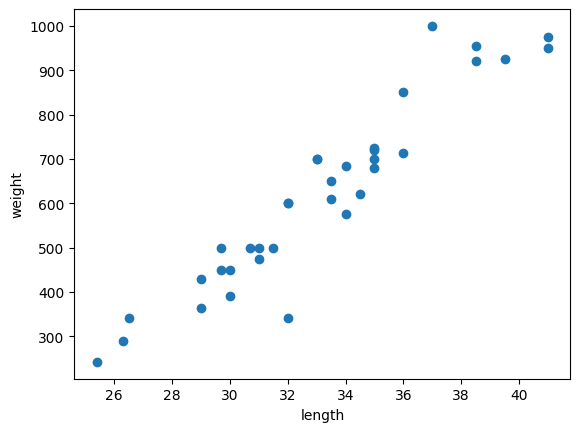

In [157]:
plt.scatter(bream_length, bream_weight)
plt.xlabel('length') # x축은 길이
plt.ylabel('weight') # y축은 무게

plt.show()

In [158]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

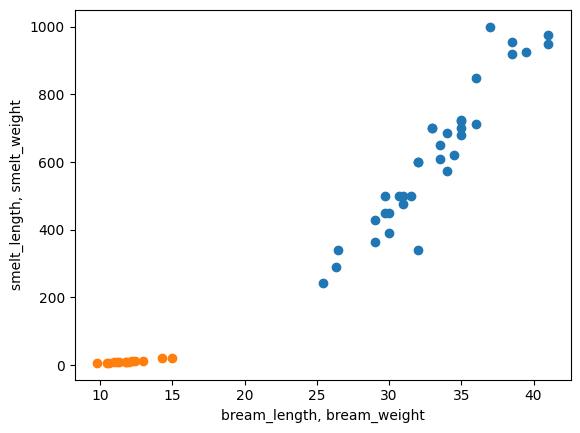

In [159]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('bream_length, bream_weight')
plt.ylabel('smelt_length, smelt_weight')

plt.show()

In [160]:
# 두 생선의 데이터를 하나로 합치기
length=bream_length+smelt_weight
weight=smelt_length+bream_weight

In [161]:
print(length)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [162]:
# 2차원 리스트 생성
fish_data=[[l,w] for l, w in zip(length, weight)]

print(fish_data)

[[25.4, 9.8], [26.3, 10.5], [26.5, 10.6], [29.0, 11.0], [29.0, 11.2], [29.7, 11.3], [29.7, 11.8], [30.0, 11.8], [30.0, 12.0], [30.7, 12.2], [31.0, 12.4], [31.0, 13.0], [31.5, 14.3], [32.0, 15.0], [32.0, 242.0], [32.0, 290.0], [33.0, 340.0], [33.0, 363.0], [33.5, 430.0], [33.5, 450.0], [34.0, 500.0], [34.0, 390.0], [34.5, 450.0], [35.0, 500.0], [35.0, 475.0], [35.0, 500.0], [35.0, 500.0], [36.0, 340.0], [36.0, 600.0], [37.0, 600.0], [38.5, 700.0], [38.5, 700.0], [39.5, 610.0], [41.0, 650.0], [41.0, 575.0], [6.7, 685.0], [7.5, 620.0], [7.0, 680.0], [9.7, 700.0], [9.8, 725.0], [8.7, 720.0], [10.0, 714.0], [9.9, 850.0], [9.8, 1000.0], [12.2, 920.0], [13.4, 955.0], [12.2, 925.0], [19.7, 975.0], [19.9, 950.0]]


In [163]:
fish_target=[1]*35+[0]*14 #이게 의미하는 것>> 도미는 1, 빙어는 0으로 표시 / 빙어는 35마리가 있고 빙어는 14마리가 있다는 것!!

print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [164]:
kn=KNeighborsClassifier() # 클래스의 객체 만들기

In [165]:
kn.fit(fish_data, fish_target) # kn() 메서드는 알고리즘 훈련

KNeighborsClassifier()

In [166]:
kn.score(fish_data, fish_target) # 정확도 

0.9183673469387755

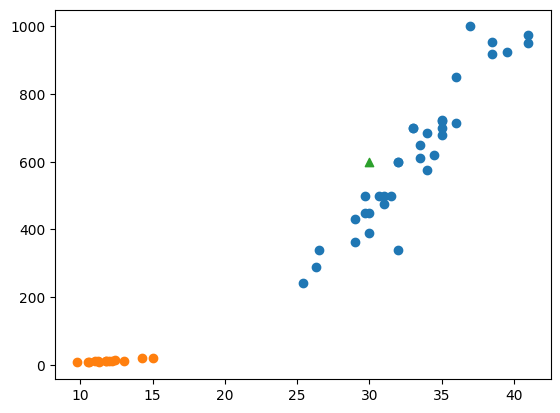

In [167]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)

plt.scatter(30,600, marker='^')
plt.show()

In [168]:
kn.predict([[30,600]]) #predict() 메서드는 새로운 데이터의 정답 예측

array([1])

In [169]:
kn49=KNeighborsClassifier(n_neighbors=49) # 참고 데이터를 49개로 한 kn49 모델

In [170]:
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)

0.7142857142857143

In [171]:
kn49.predict([[30,600]])

array([1])

In [172]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 
                620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [173]:
# 2차원 리스트 생성
fist_data=[[l,w] for l,w in zip(fish_length, fish_weight)]

fish_target=[1]*35+[0]*14

In [174]:
# 리스트를 넘파이 배열로 바꾸기
input_arr=np.array(fish_data)
target_arr=np.array(fish_data)

In [175]:
print(input_arr)

[[  25.4    9.8]
 [  26.3   10.5]
 [  26.5   10.6]
 [  29.    11. ]
 [  29.    11.2]
 [  29.7   11.3]
 [  29.7   11.8]
 [  30.    11.8]
 [  30.    12. ]
 [  30.7   12.2]
 [  31.    12.4]
 [  31.    13. ]
 [  31.5   14.3]
 [  32.    15. ]
 [  32.   242. ]
 [  32.   290. ]
 [  33.   340. ]
 [  33.   363. ]
 [  33.5  430. ]
 [  33.5  450. ]
 [  34.   500. ]
 [  34.   390. ]
 [  34.5  450. ]
 [  35.   500. ]
 [  35.   475. ]
 [  35.   500. ]
 [  35.   500. ]
 [  36.   340. ]
 [  36.   600. ]
 [  37.   600. ]
 [  38.5  700. ]
 [  38.5  700. ]
 [  39.5  610. ]
 [  41.   650. ]
 [  41.   575. ]
 [   6.7  685. ]
 [   7.5  620. ]
 [   7.   680. ]
 [   9.7  700. ]
 [   9.8  725. ]
 [   8.7  720. ]
 [  10.   714. ]
 [   9.9  850. ]
 [   9.8 1000. ]
 [  12.2  920. ]
 [  13.4  955. ]
 [  12.2  925. ]
 [  19.7  975. ]
 [  19.9  950. ]]


In [176]:
# 데이터를 무작위로 섞기
np.random.seed(42)

index=np.arange(49)
np.random.shuffle(index)

In [177]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [178]:
train_input=input_arr[index[:35]]
train_target=target_arr[index[:35]]

In [179]:
test_input=input_arr[index[35:]]
test_target=target_arr[index[35:]]

In [180]:
print(train_input.shape)
print(test_input.shape)

(35, 2)
(14, 2)


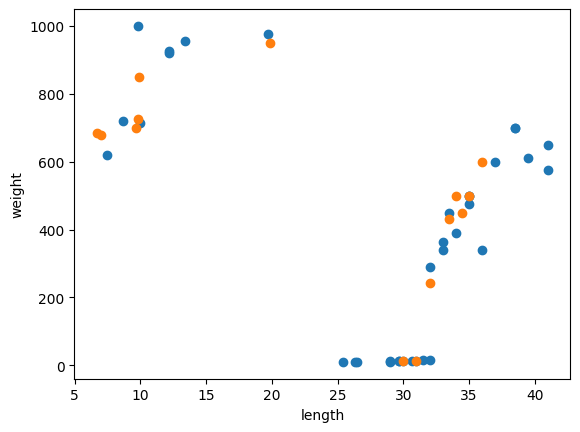

In [186]:
# 테스트 세트와 훈련 세트를 출력
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [220]:
kn=KNeighborsClassifier()
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [223]:
kn.predict(test_input)

array([  32.,   85.,  197.,  110.,  120.,  650.,  218.,  145.,  650.,
         85., 1000.,   32.,  197.,  197.])

k-최근접 이웃 회귀

In [192]:
# 농어 데이터
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

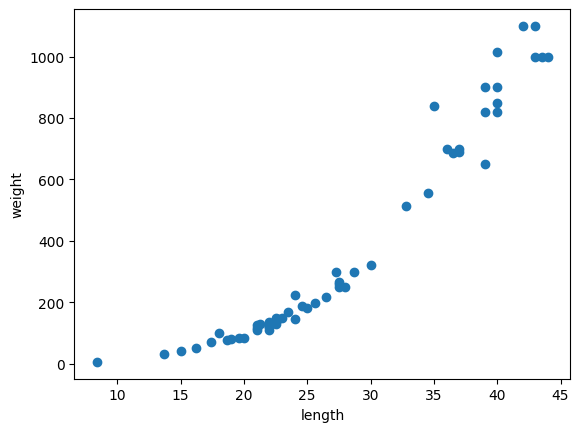

In [193]:
# 어떤 형태를 띠고 있는지 산점도를 출력하기
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
# 훈련 세트와 테스트 세트로 나누기
train_input, test_input, train_target, test_target=train_test_split(
    perch_length, perch_weight, random_state=42
)

In [196]:
print(train_input.shape)
print(test_input.shape)

(42,)
(14,)


In [197]:
# 2차원 배열로 바꾸기
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

In [198]:
print(train_input.shape)
print(test_input.shape)

(42, 1)
(14, 1)


In [199]:
from sklearn.neighbors import KNeighborsRegressor

In [200]:
knr=KNeighborsRegressor()

In [201]:
knr.fit(train_input, train_target) # k-최근접 이웃 회귀 모델을 훈련

KNeighborsRegressor()

In [202]:
print(knr.score(train_input, train_target)) # 훈련 세트의 점수
print(knr.score(test_input, test_target)) # 테스트 세트의 점수

# 훈련 세트가 테스트 세트보다 점수가 좋으면 과대적합, 그 반대면 과소적합이라고 함

0.9698823289099254
0.992809406101064


In [203]:
knr40=KNeighborsRegressor(n_neighbors=2) # 이웃의 개수를 2로 설정

In [204]:
knr40.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=2)

In [205]:
print(knr40.score(train_input, train_target))
print(knr40.score(test_input, test_target))

0.9828437127041165
0.9725010241788556


선형회귀

In [206]:
from sklearn.linear_model import LinearRegression

In [207]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)

1주차 과제-분류

In [208]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [209]:
X, y = load_iris(return_X_y=True) # Iris 데이터셋 로드
X = X[:, :2]

In [210]:
# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [211]:
# 로지스틱 회귀 모델 초기화 및 학습
model = LogisticRegression().fit(X_train, y_train)

In [212]:
# 정확도 측정
accuracy = accuracy_score(y_test, model.predict(X_test))
print(accuracy)

0.9


Text(0, 0.5, 'Sepal Width')

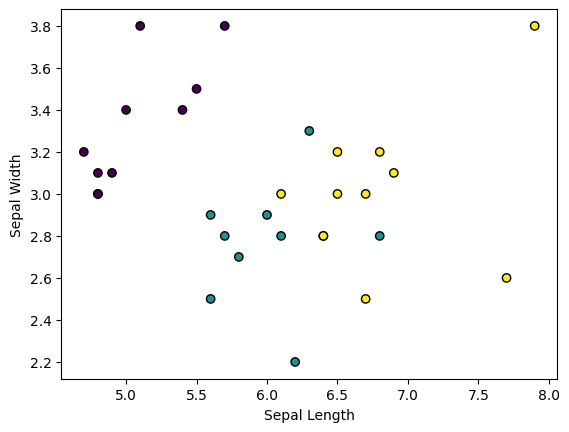

In [213]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', edgecolors='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

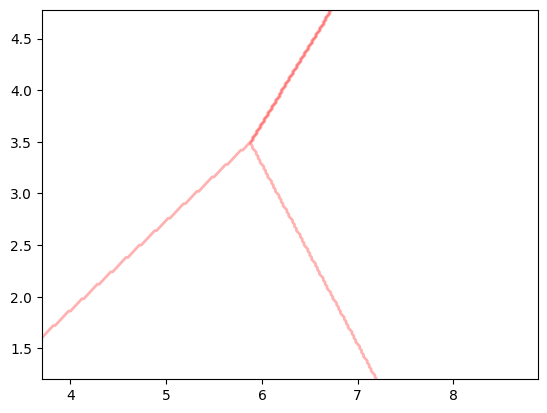

In [214]:
# 결정 경계 시각화
h = .02
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0, 1, 2], linewidths=2, colors='red', alpha=0.3)

plt.show()

1주차 과제-회귀

In [215]:
from sklearn.linear_model import LinearRegression

In [216]:
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # 1차 함수의 X 값
y = np.array([2, 4, 5, 4, 5])  # 1차 함수의 y 값

In [217]:
model = LinearRegression().fit(X, y) # 선형 회귀 모델 초기화

In [218]:
new_X = np.array([[6]])  # 새로운 X 값
predicted_y = model.predict(new_X) # 새로운 X 값 예측하기
print(predicted_y[0])


5.800000000000001


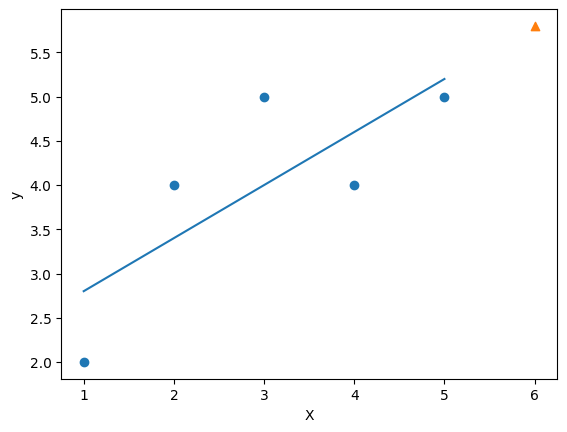

In [219]:
# 훈련 데이터와 선형 회귀 모델의 예측 시각화
plt.scatter(X, y)  # 훈련 데이터 시각화
plt.plot(X, model.predict(X))  # 선형 회귀 모델의 예측 시각화
plt.scatter(new_X, predicted_y,marker='^')  # 새로운 X 값에 대한 예측 시각화
plt.xlabel('X')  
plt.ylabel('y') 
plt.show()  